**Step 1**: Import Necessary Libraries.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, classification_report, mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

**Step 2**: Read the Dataset.

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset/test.csv")

**Step 3:** Dataset Basic Information.

In [5]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


**Step 4**: Exploratory Data Analysis.

> Add blockquote



In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
print(df_train['Survived'].value_counts())
print("----------Train Data----------")

Survived
0    549
1    342
Name: count, dtype: int64
----------Train Data----------


In [13]:
print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


*Survived*

<Axes: xlabel='Survived', ylabel='count'>

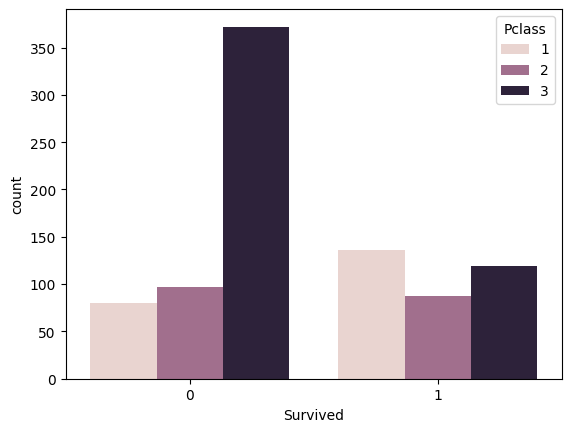

In [14]:
sns.countplot(data=df_train, x='Survived', hue='Pclass')

**Sex Wise**

Count of females who survived: 233
Count of females who did not survive: 81
--------------------------------------------
Count of males who survived: 109
Count of males who did not survive: 468


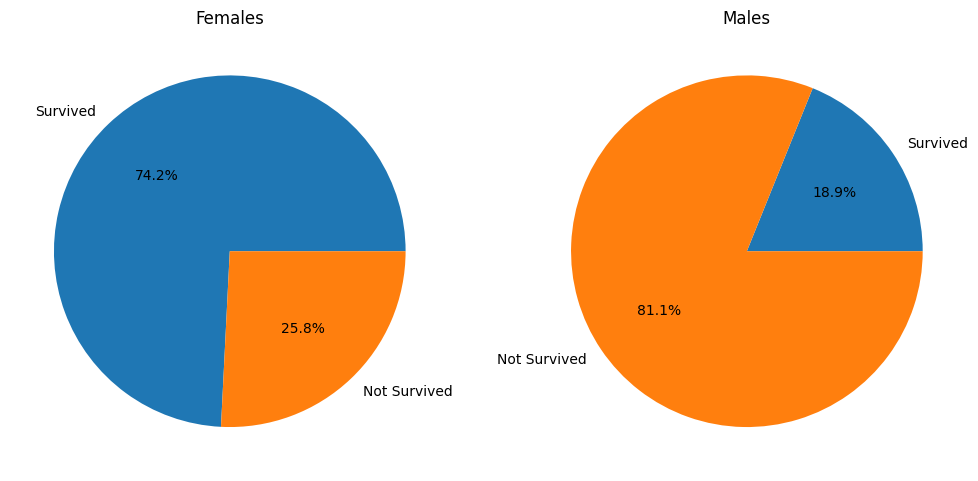

In [15]:
female_survived_count = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)].shape[0]
female_not_survived_count = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)].shape[0]
male_survived_count = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)].shape[0]
male_not_survived_count = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)].shape[0]
print("Count of females who survived:", female_survived_count)
print("Count of females who did not survive:", female_not_survived_count)
print("--------------------------------------------")
print("Count of males who survived:", male_survived_count)
print("Count of males who did not survive:", male_not_survived_count)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels = ['Survived', 'Not Survived']
sizes = [female_survived_count, female_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Females')
plt.subplot(1, 2, 2)
sizes = [male_survived_count, male_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Males')
plt.tight_layout()
plt.show()

**Age Wise**

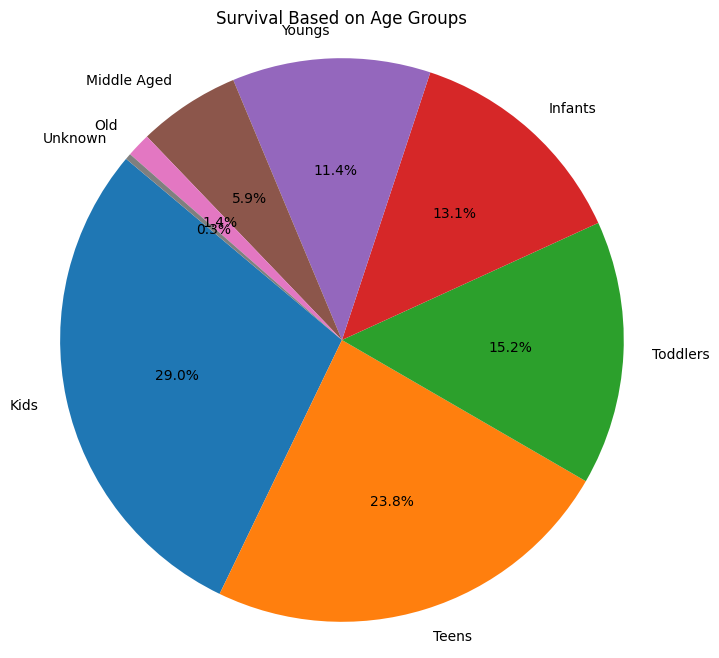

In [16]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survivors_by_age_group, labels=survivors_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Based on Age Groups')
plt.axis('equal')
plt.show()


**SibSp**

In [17]:
df_train['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


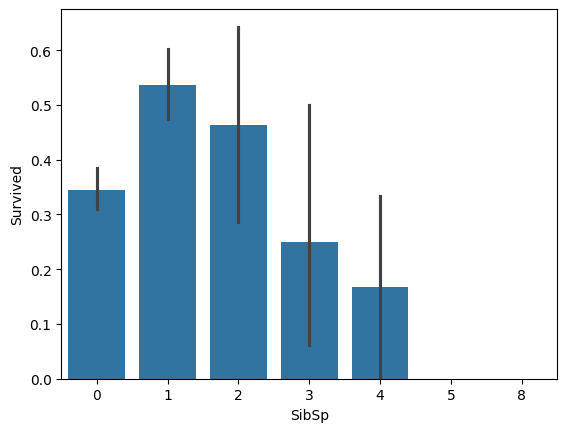

In [18]:
sns.barplot(x="SibSp", y="Survived", data=df_train)
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 3 who survived:", df_train["Survived"][df_train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 4 who survived:", df_train["Survived"][df_train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

**Embarked**

<Figure size 800x600 with 0 Axes>

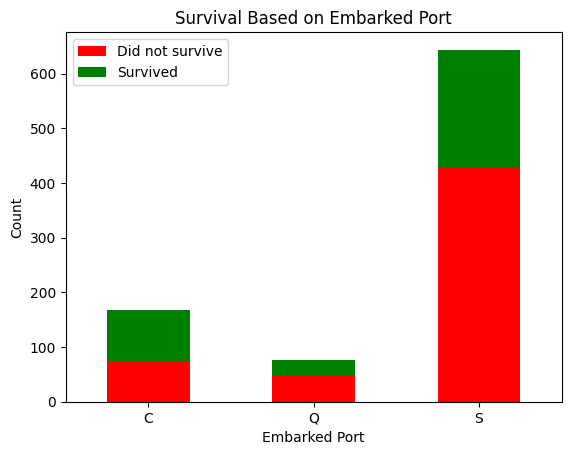

In [19]:
survivors_by_embarked = df_train.groupby(['Embarked', 'Survived']).size().unstack()
plt.figure(figsize=(8, 6))
survivors_by_embarked.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Survival Based on Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.show()

In [20]:
survived_by_embarked = df_train[df_train['Survived'] == 1]['Embarked'].value_counts()
print("Survived based on embarked port:")
print(survived_by_embarked)
print("-------------------------------------")
non_survived_by_embarked = df_train[df_train['Survived'] == 0]['Embarked'].value_counts()
print("Non-survival based on embarked port:")
print(non_survived_by_embarked)

Survived based on embarked port:
Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
-------------------------------------
Non-survival based on embarked port:
Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


**Fare Wise**

In [21]:
fig = px.scatter(df_train, x='Age', y='Fare', color='Survived', title='Age vs Fare')
fig.show()

**Step 5**: Check Missing Values.

<Axes: >

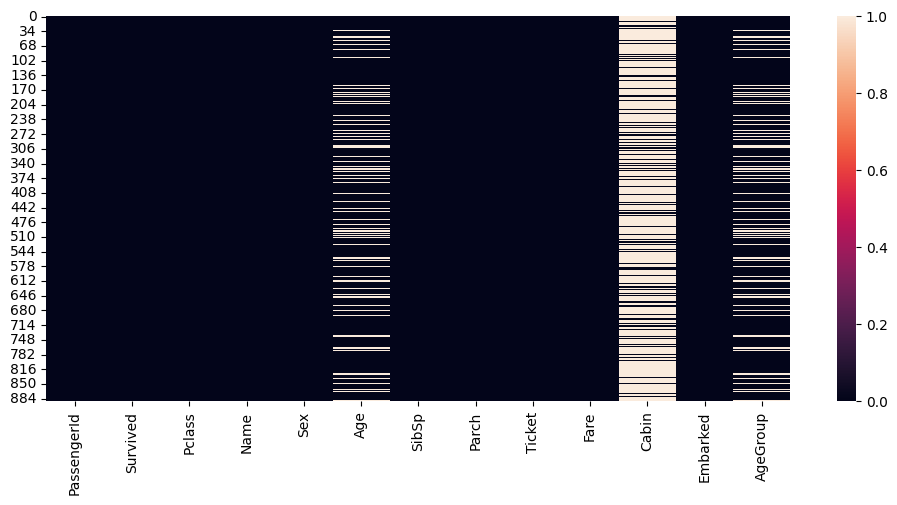

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(df_train.isnull())

<Axes: >

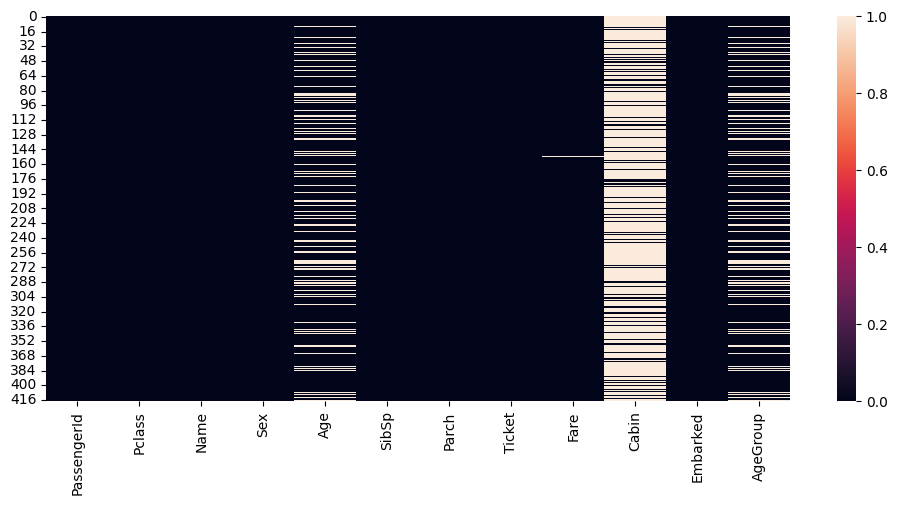

In [23]:
plt.figure(figsize=(12,5))
sns.heatmap(df_test.isnull())

In [24]:
df_train.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
AgeGroup,177
Embarked,2
PassengerId,0
Sex,0
Name,0
Pclass,0
Survived,0
Ticket,0


In [25]:
df_test.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
Age,86
AgeGroup,86
Fare,1
Sex,0
Name,0
Pclass,0
PassengerId,0
Ticket,0
Parch,0


In [26]:
percentage=(df_train.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

,0
Cabin,77.104377
Age,19.865320
AgeGroup,19.865320
Embarked,0.224467
PassengerId,0.000000
Sex,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Ticket,0.000000


In [27]:
percentage=(df_test.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

,0
Cabin,36.700337
Age,9.652076
AgeGroup,9.652076
Fare,0.112233
Sex,0.000000
Name,0.000000
Pclass,0.000000
PassengerId,0.000000
Ticket,0.000000
Parch,0.000000


**Step 6**: Impute Missing Values

In [28]:
missing_data_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()
print("Columns  of missing values in train data :",missing_data_cols)

Columns  of missing values in train data : ['Age', 'Cabin', 'Embarked', 'AgeGroup']


In [29]:
df_train.drop('Cabin', axis=1, inplace=True)

In [30]:
categorical_cols = ["Embarked",'AgeGroup']
bool_cols = []
numeric_cols = ["Age"]
missing_data_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()
df=df_train.copy()

In [35]:
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass
    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass
    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]

In [38]:
df_test.drop('Cabin', axis=1, inplace=True)

In [39]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [40]:
categorical_cols = []
bool_cols = []
numeric_cols = ["Age", "Fare"]
missing_data_cols = df_test.isnull().sum()[df_test.isnull().sum() > 0].index.tolist()

In [41]:
def impute_categorical_missing_data(passed_col):
    df_null=df[df[passed_col].isnull()]
    df_not_null=df[df[passed_col].notnull()]
    X=df_not_null.drop(passed_col,axis=1)
    y=df_not_null[passed_col]
    other_missing_cols=[col for col in missing_data_cols if col!=passed_col]
    label_encoder=LabelEncoder()
    for col in X.columns:
        if X[col].dtype=='object' or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])
    if passed_col in bool_cols:
        y=label_encoder.fit_transform(y)
    iterative_imputer=IterativeImputer(estimator=RandomForestRegressor(random_state=42),add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values=X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    rf_classifier=RandomForestClassifier()
    rf_classifier.fit(X_train,y_train)
    y_pred=rf_classifier.predict(X_test)
    acc_score=accuracy_score(y_test,y_pred)
    print("The feature '"+passed_col+"' has been imputed with",round((acc_score*100),2),"accuracy\n")
    X=df_null.drop(passed_col,axis=1)
    for col in X.columns:
        if X[col].dtype=='object' or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values=X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
    if len(df_null)>0:
        df_null[passed_col]=rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col]=df_null[passed_col].map({0:False,1:True})
    df_combined=pd.concat([df_not_null,df_null])
    return df_combined[passed_col]
def impute_continuous_missing_data(passed_col):
    df_null=df[df[passed_col].isnull()]
    df_not_null=df[df[passed_col].notnull()]
    X=df_not_null.drop(passed_col,axis=1)
    y=df_not_null[passed_col]
    other_missing_cols=[col for col in missing_data_cols if col!=passed_col]
    label_encoder=LabelEncoder()
    for col in X.columns:
        if X[col].dtype=='object' or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])
    iterative_imputer=IterativeImputer(estimator=RandomForestRegressor(random_state=42),add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values=X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    rf_regressor=RandomForestRegressor()
    rf_regressor.fit(X_train,y_train)
    y_pred=rf_regressor.predict(X_test)
    print("MAE =",mean_absolute_error(y_test,y_pred),"\n")
    print("RMSE =",mean_squared_error(y_test,y_pred,squared=False),"\n")
    print("R2 =",r2_score(y_test,y_pred),"\n")
    X=df_null.drop(passed_col,axis=1)
    for col in X.columns:
        if X[col].dtype=='object' or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values=X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
    if len(df_null)>0:
        df_null[passed_col]=rf_regressor.predict(X)
    df_combined=pd.concat([df_not_null,df_null])
    return df_combined[passed_col]

Step 7: Handle Outliers.

In [43]:
df_train = df_train[df_train['Age'] < 70]
df_train = df_train[df_train['Fare'] < 500]

*Step 8*: Machine Learning

In [44]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Teens
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Youngs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Old
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Kids
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Kids


In [45]:
df_train.drop(['Name','Ticket','AgeGroup'],axis=1,inplace=True)
df_test.drop(['Name','Ticket','AgeGroup'],axis=1,inplace=True)

In [46]:
le = LabelEncoder()
for col in df_train.columns:
    if df_train[col].dtypes == 'object' or df_train[col].dtypes == 'category':
        df_train[col] = le.fit_transform(df_train[col])
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtypes == 'object' or df_test[col].dtypes == 'category':
        df_test[col] = le.fit_transform(df_test[col])

In [47]:
X = df_train.drop(['Survived','PassengerId'],axis=1)
y = df_train['Survived']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Define the pipeline with a scaler and the random forest classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters for grid search
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30]
}

# Perform grid search using the pipeline and parameters
clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X_train, y_train)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)

# Print the results
print("Best Random Forest Model:")
print("Test Accuracy:", accuracy_best)
print("F1 Score:", f1)
print("Precision Score:", precision)
print("------------------------------------------")
print("Confusion Matrix:",conf_matrix)


Best Random Forest Model:
Test Accuracy: 0.8297872340425532
F1 Score: 0.76
Precision Score: 0.8444444444444444
------------------------------------------
Confusion Matrix: [[79  7]
 [17 38]]


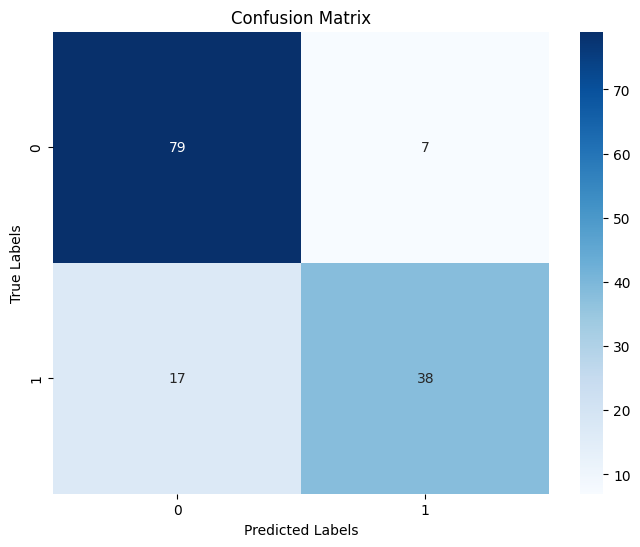

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()